In [735]:
import numpy as np
import matplotlib.pyplot as plt

# Construir sua primeira rede neural
<img src="files/produto_interno.png" width="200" height="100">
A primeira etapa é definir o vetor de entrada

In [736]:
input_vector = [1.72, 1.23]

A segunda consiste em escolher os pesos

In [737]:
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

Calcular o produto interno do vetor de entrada pelo pesos 1

In [738]:
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

In [739]:
print(f"O produto da primeira entrada pelo peso é: {first_indexes_mult}")

O produto da primeira entrada pelo peso é: 2.1672


In [740]:
print(f"O produto da primeira entrada pelo peso é: {second_indexes_mult}")

O produto da primeira entrada pelo peso é: 0.0


In [741]:
print(f"O produto interno é: {dot_product_1}")

O produto interno é: 2.1672


### Repetir as operações usando numpy
Importar a biblioteca numpy

In [742]:
import numpy as np

Calcular o produto interno do vetor de entrada pelo pesos 1 usando numpy

In [743]:
dot_product_1 = np.dot(input_vector, weights_1)

In [744]:
print(f"O produto interno é: {dot_product_1}")

O produto interno é: 2.1672


Calcular o produto interno do vetor de entrada pelo pesos 2 usando numpy


In [745]:
dot_product_2 = np.dot(input_vector, weights_2)

In [746]:
print(f"O produto interno é: {dot_product_2}")

O produto interno é: 4.1259999999999994


# Um problema de classificação

| Vetor de Entrada | Alvo |
| :- | -: |
| [1.66, 1.56] | 1 |
|   [2, 1.5]   | 0 |

#### Envolvendo os vetores em matrizes NumPy

In [747]:
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

#### Definição da função sigmoide

In [748]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<function matplotlib.pyplot.show(close=None, block=None)>

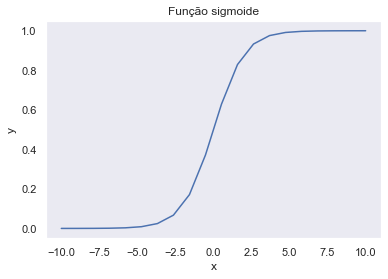

In [749]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-10,10,20)
y = sigmoid(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função sigmoide')
plt.grid()
plt.show

#### Definição da função de predição

In [750]:
def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     print(f"O resultado da saida da camada 1 é: {layer_1}")
     layer_2 = sigmoid(layer_1)
     return layer_2

In [751]:
prediction = make_prediction(input_vector, weights_1, bias)
print(f"O resultado da predição é: {prediction}")

O resultado da saida da camada 1 é: [1.3774]
O resultado da predição é: [0.7985731]


Modificando o vetor de entrada

In [752]:
input_vector = np.array([2, 1.5])

In [753]:
prediction = make_prediction(input_vector, weights_1, bias)
print(f"O resultado da predição é: {prediction}")

O resultado da saida da camada 1 é: [1.91]
O resultado da predição é: [0.87101915]


| Vetor de Entrada | Alvo | Predito |
| :- | -: | -: |
| [1.66, 1.56] | 1 | 0.798 |
|   [2, 1.5]   | 0 | 0.871 |

Treinar sua primeira rede neural:

In [754]:
target = 0
mse = np.square(prediction - target)
print(f"Predição: {prediction}; Erro: {mse}")

Predição: [0.87101915]; Erro: [0.75867436]


Calcular da derivada:

In [755]:
derivative = 2 * (prediction - target)
print(f"A derivada é {derivative}")

A derivada é [1.7420383]


Atualizar pesos:

In [756]:
print(f"O peso anterior é {weights_1}")
weights_1 = weights_1 - derivative
print(f"O peso atualizado é {weights_1}")

O peso anterior é [ 1.45 -0.66]
O peso atualizado é [-0.2920383 -2.4020383]


Fazendo uma nova predição:

In [757]:
prediction = make_prediction(input_vector, weights_1, bias)
error = (prediction - target) ** 2
print(f"Prediction: {prediction}; Error: {error}")

O resultado da saida da camada 1 é: [-4.18713403]
Prediction: [0.01496248]; Error: [0.00022388]


In [758]:
input_vector2 = [1.66, 1.56]
target = 1
prediction = make_prediction(input_vector2, weights_1, bias)
error = (prediction - target) ** 2
print(f"Prediction: {prediction}; Error: {error}")

O resultado da saida da camada 1 é: [-4.23196331]
Prediction: [0.01431593]; Error: [0.97157309]


| Vetor de Entrada | Alvo | Predito |
| :- | -: | -: |
| [1.66, 1.56] | 1 | 0.798 |
|   [2, 1.5]   | 0 | 0.015 |

In [759]:
input_vector3 = [0.5, 2.5]
target = 1
prediction = make_prediction(input_vector3, weights_1, bias)
error = (prediction - target) ** 2
print(f"Prediction: {prediction}; Error: {error}")

O resultado da saida da camada 1 é: [-6.15111489]
Prediction: [0.00212657]; Error: [0.99575138]


### Ajustando os parâmetros com retropropagação

In [760]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [761]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

<function matplotlib.pyplot.show(close=None, block=None)>

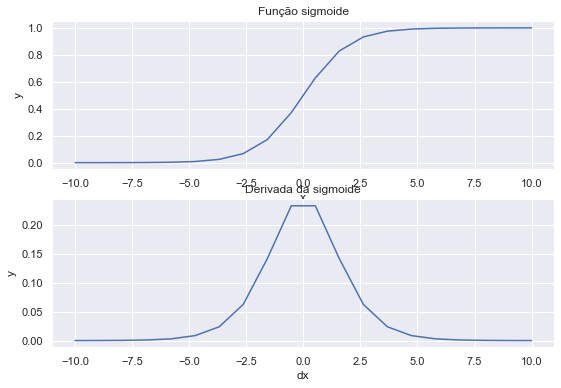

In [762]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
x=np.linspace(-10,10,20)
y = sigmoid(x)
plt.subplot(2,1,1)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função sigmoide')
plt.subplot(2,1,2)
dy= sigmoid_deriv(x)
plt.plot(x,dy)
plt.xlabel('dx')
plt.ylabel('y')
plt.title('Derivada da sigmoide')
plt.show

Calculando a derivada do erro de predição

In [763]:
print(f"O valor predito: {prediction}")
print(f"O valor do alvo é: {target}")
derror_dprediction = 2 * (prediction - target)
print(f"A derivada do erro de predição é: {derror_dprediction}")
print(f"O valor do peso 1: {weights_1}")

O valor predito: [0.00212657]
O valor do alvo é: 1
A derivada do erro de predição é: [-1.99574685]
O valor do peso 1: [-0.2920383 -2.4020383]


Calculando o erro na saida da camada 1

In [764]:
print(f"O vetor de entrada: {input_vector}")
print(f"O vetor de pesos na primeira camada: {weights_1}")
print(f"O valor da polarização na primeira camada: {bias}")
layer_1 = np.dot(input_vector, weights_1) + bias
print(f"O valor de saida na primeira camada antes da função de ativação: {layer_1}")
print(f"O valor de saida na primeira camada apos a função de ativação: {sigmoid_deriv(layer_1)}")
dprediction_dlayer1 = sigmoid_deriv(layer_1)
print(f"A derivada do erro na saida da primeira camada é: {derror_dprediction}")

O vetor de entrada: [2.  1.5]
O vetor de pesos na primeira camada: [-0.2920383 -2.4020383]
O valor da polarização na primeira camada: [0.]
O valor de saida na primeira camada antes da função de ativação: [-4.18713403]
O valor de saida na primeira camada apos a função de ativação: [0.0147386]
A derivada do erro na saida da primeira camada é: [-1.99574685]


# Criando uma classe de rede neural

<img src="files/Rede_Inicio02.png" width="500" height="250">

Etapa 1: Inicializar os pesos e a polarização

In [765]:
np.random.seed(0) 
weights = np.array([np.random.randn(), np.random.randn()])
print(f"O vetor de peso: {weights}")
bias = np.random.randn()
print(f"O valor da polarização: {bias}")

O vetor de peso: [1.76405235 0.40015721]
O valor da polarização: 0.9787379841057392


Criar uma função para inicializar pesos, polarização e taxa de aprendizagem

In [766]:
def parametros(learning_rate):
        np.random.seed(0) 
        weights = np.array([np.random.randn(), np.random.randn()])
        bias = np.random.randn()
        learning_rate = learning_rate
        return weights, bias, learning_rate
    
learning_rate = 0.001
inicial = parametros(learning_rate)
print(f"O vetor de peso é: {weights}")
print(f"O valor da polarização é: {bias}")
print(f"A taxa de aprendizagem é: {learning_rate}")

O vetor de peso é: [1.76405235 0.40015721]
O valor da polarização é: 0.9787379841057392
A taxa de aprendizagem é: 0.001


Etapa 2: Criar a função de ativação e a derivada da função

Função sigmoide:
$ f(s) = \frac{1}{1+e^{-s}} $

In [767]:
def _sigmoid( x):
        return 1 / (1 + np.exp(-x))

sig = _sigmoid(2)
print(f"O valor da sigmoide de 2 é: {sig}")

O valor da sigmoide de 2 é: 0.8807970779778823


Derivada da função sigmoide:
$ f{'}(s) = f(s)(1-f(s)) $

In [768]:
def _sigmoid_deriv( x):
        return _sigmoid(x) * (1 - _sigmoid(x))
der_sig = _sigmoid_deriv(2)
print(f"O valor da derivada da sigmoide de 2 é: {der_sig}")

O valor da derivada da sigmoide de 2 é: 0.10499358540350662


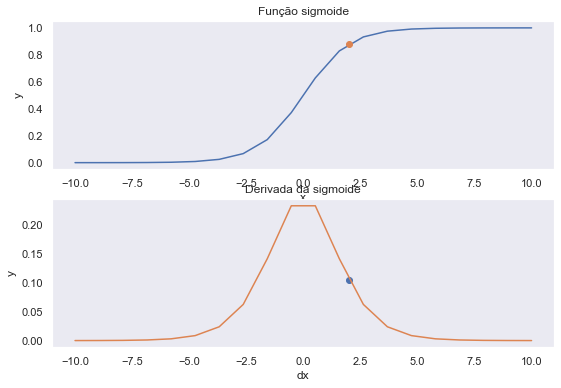

In [769]:
plt.figure(figsize=(9, 6))
x=np.linspace(-10,10,20)
y = sigmoid(x)
plt.subplot(2,1,1)
plt.plot(x,y)
plt.plot(2,0.88,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função sigmoide')
plt.grid()
plt.subplot(2,1,2)
dy= sigmoid_deriv(x)
plt.plot(2,0.105,'o')
plt.plot(x,dy)
plt.xlabel('dx')
plt.ylabel('y')
plt.title('Derivada da sigmoide')
plt.show
plt.grid()

Etapa 3: Criar a função de predição (forward)

Camada 1 (layer_1): $ s = x_{1} * W_{1} + x_{2} * W_{2}  + b  $

Camada 2 (layer 2):
$ f(s) = \frac{1}{1+e^{-s}} $

Saida: $ y = f(s) $

In [770]:
def predict(input_vector):
        layer_1 = np.dot(input_vector, weights) + bias
        layer_2 = sigmoid(layer_1)        
        prediction = layer_2
        return prediction, layer_1, layer_2

input_vector = [1.72, 1.23]
pred = predict(input_vector)
prediction = pred[0]
print(f"Para a entrada: {input_vector}")
print(f"O valor predito é: {prediction}")
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")
print(f"O resultado da camada de entrada é: {pred[1]}")
print(f"O resultado da camada de saida é: {pred[2]}")

Para a entrada: [1.72, 1.23]
O valor predito é: 0.989068352135059
O valor dos pesos da camada de entrada é: [1.76405235 0.40015721]
O valor da polaridade da camada de entrada é: 0.9787379841057392
O resultado da camada de entrada é: 4.505101385461805
O resultado da camada de saida é: 0.989068352135059


Etapa 3: Calculo do erro quadrático

$ E = \frac{1}{2}(alvo - predito)^{2} $

In [771]:
def erro(target, prediction):
    error = (1/2)*(target - prediction) ** 2
    return error

target = 1 
error = erro(target, prediction)
print(f"Prediction: {prediction}; Error: {error}")

Prediction: 0.989068352135059; Error: 5.975046252153513e-05


Etapa 4: Criar a função que calcula o gradiente

$ E = (1/2)*[alvo - \frac{1}{1 + e^{-(X_{1}  W_{1} + X_{2}  W_{2}  + b)}}]^{2}  $

$ \frac{\partial{E}}{\partial{W_{1}}} = \frac{\partial{E}}{\partial{Predito}} \frac{\partial{Predito}}{\partial{s}} \frac{\partial{s}}{\partial{W_{1}}} $

$ \frac{\partial{E}}{\partial{W_{2}}} = \frac{\partial{E}}{\partial{Predito}} \frac{\partial{Predito}}{\partial{s}} \frac{\partial{s}}{\partial{W_{2}}} $

$ \frac{\partial{E}}{\partial{b}} = \frac{\partial{E}}{\partial{Predito}} \frac{\partial{Predito}}{\partial{s}} \frac{\partial{s}}{\partial{b}} $

$ \frac{\partial{E}}{\partial{predito}} = (alvo - predito)(-1) = predito -alvo $

$ \frac{\partial{Predito}}{\partial{s}} = f{'}(s) = f(s)(1-f(s))  $

$ \frac{\partial{s}}{\partial{W_{1}}} = \frac{\partial{(x_{1} * W_{1} + x_{2} * W_{2}  + b})}{\partial{W_{1}}} = x_{1} $  

$ \frac{\partial{s}}{\partial{W_{2}}} = \frac{\partial{(x_{1} * W_{1} + x_{2} * W_{2}  + b})}{\partial{W_{2}}} = x_{2} $

$ \frac{\partial{s}}{\partial{b}} = \frac{\partial{(x_{1} * W_{1} + x_{2} * W_{2}  + b})}{\partial{b}} = 1 $

In [772]:
def _compute_gradients(input_vector, prediction, target):
              
        derror_dprediction = prediction - target
        dprediction_dlayer1 = _sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * weights) + (1 * input_vector)
        derror_dweights = derror_dprediction*dprediction_dlayer1*dlayer1_dweights
        derror_dbias = derror_dprediction*dprediction_dlayer1*dlayer1_dbias
        
        return derror_dweights, derror_dbias, derror_dprediction, dprediction_dlayer1, \
        dlayer1_dbias, dlayer1_dweights                                 
        

print(f"O valor de alvo é: {target}")
gradiente = _compute_gradients(input_vector,prediction, target) 
derror_dweights = gradiente[0]
derror_dbias = gradiente[1]
print(f"A derivada do erro de predição em relação aos pesos é: {gradiente[0]}")
print(f"A derivada do erro de predição em relação a polarização é: {gradiente[1]}")
print(f"A derivada do erro de predição é: {gradiente[2]}")
print(f"A derivada do erro de predição na camada de entrada é: {gradiente[3]}")
print(f"A derivada da polarização é: {gradiente[4]}")
print(f"A derivada dos pesos são: {gradiente[5]}")

O valor de alvo é: 1
A derivada do erro de predição em relação aos pesos é: [-0.00027712 -0.00019817]
A derivada do erro de predição em relação a polarização é: [-0.00016112]
A derivada do erro de predição é: -0.010931647864941052
A derivada do erro de predição na camada de entrada é: [0.0147386]
A derivada da polarização é: 1
A derivada dos pesos são: [1.72 1.23]


Etapa 5: <br/>
Atualização dos pesos e polarização <br/>
&nbsp;&nbsp;&nbsp; $ W_{1} = W_{1} - \eta *\frac{\partial{E}}{\partial{W_{1}}} $  <br/>
&nbsp;&nbsp;&nbsp; $ W_{2} = W_{2} - \eta *\frac{\partial{E}}{\partial{W_{2}}} $  <br/>
&nbsp;&nbsp;&nbsp; $ b = b - \eta *\frac{\partial{E}}{\partial{b}} $

In [773]:
def _update_parameters(derror_dbias, derror_dweights,bias,weights,learning_rate):
        bias = bias - (derror_dbias * learning_rate)        
        weights = weights - (derror_dweights * learning_rate)
        
        return bias, weights

print('---------------ITERAÇÃO 1 ----------------')    
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")  
print(f"O valor predito é: {pred[0]}")

atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
bias = atualiza[0]
weights = atualiza[1]
print('---------------ITERAÇÃO 2----------------')
print(f"O valor dos pesos da camada de entrada é: {atualiza[1]}")
print(f"O valor da polaridade da camada de entrada é: {atualiza[0]}")
pred =predict(input_vector)
print(f"O valor predito é: {pred[0]}")

atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
bias = atualiza[0]
weights = atualiza[1]
print('---------------ITERAÇÃO 3----------------')
print(f"O valor dos pesos da camada de entrada é: {atualiza[1]}")
print(f"O valor da polaridade da camada de entrada é: {atualiza[0]}")
pred =predict(input_vector)
print(f"O valor predito é: {pred[0]}")

---------------ITERAÇÃO 1 ----------------
O valor dos pesos da camada de entrada é: [1.76405235 0.40015721]
O valor da polaridade da camada de entrada é: 0.9787379841057392
O valor predito é: 0.989068352135059
---------------ITERAÇÃO 2----------------
O valor dos pesos da camada de entrada é: [1.76405262 0.40015741]
O valor da polaridade da camada de entrada é: [0.97873815]
O valor predito é: [0.98906836]
---------------ITERAÇÃO 3----------------
O valor dos pesos da camada de entrada é: [1.7640529 0.4001576]
O valor da polaridade da camada de entrada é: [0.97873831]
O valor predito é: [0.98906837]


In [799]:
def parametros(learning_rate):
        np.random.seed(0) 
        weights = np.array([np.random.randn(), np.random.randn()])
        bias = np.random.randn()
        learning_rate = learning_rate
        return weights, bias, learning_rate
        
def _sigmoid( x):
        return 1 / (1 + np.exp(-x))
    
def _sigmoid_deriv( x):
        return _sigmoid(x) * (1 - _sigmoid(x))
    
def _tangent(x):
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) 
                
def _tangent_deriv(x):
        return 1 - (_tangent(x))**2
    
def predict(input_vector, weights, bias, f_ativacao): 
    layer_1 = np.dot(input_vector, weights) + bias    
    
    if f_ativacao == 'sigmoide' or  f_ativacao == '':
        layer_2 = sigmoid(layer_1)
        
    else:
        layer_2 = _tangent(layer_1)
        
    prediction = layer_2
         
    return prediction, layer_1, layer_2
    
def erro(target, prediction):
    error = (1/2)*(target - prediction) ** 2    
    return error

def _compute_gradients(input_vector, prediction, target, f_ativacao): 
    if f_ativacao == 'sigmoide' or  f_ativacao == '':
        dprediction_dlayer1 = _sigmoid_deriv(layer_1)
    else:
        dprediction_dlayer1 = _tangent_deriv(layer_1)
            
    derror_dprediction = prediction - target        
    dlayer1_dbias = 1
    dlayer1_dweights = (0 * weights) + (1 * input_vector)
    derror_dweights = derror_dprediction*dprediction_dlayer1*dlayer1_dweights
    derror_dbias = derror_dprediction*dprediction_dlayer1*dlayer1_dbias        
    return derror_dweights, derror_dbias, derror_dprediction, dprediction_dlayer1, \
        dlayer1_dbias, dlayer1_dweights
    
def _update_parameters(derror_dbias, derror_dweights,bias,weights,learning_rate):
    bias = bias - (derror_dbias * learning_rate)        
    weights = weights - (derror_dweights * learning_rate)        
    return bias, weights    

In [831]:
learning_rate = 0.001
parametros(learning_rate)
target = 1 
input_vector = [1.72, 1.23]
net_error = []
net_weights1 = []
net_weights2 = []
net_bias = []
for k in range(1000000):
    pred = predict(input_vector,weights, bias,'tangent')    
    prediction = pred[0]    
    error = erro(target, prediction)     
    net_error.append(error)
    gradiente = _compute_gradients(input_vector,prediction, target,'tangent') 
    derror_dweights = gradiente[0]
    derror_dbias = gradiente[1]      
    atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
    bias = atualiza[0]
    weights = atualiza[1]
    net_weights1.append(weights[0])
    net_weights2.append(weights[1])
    net_bias.append(bias)   

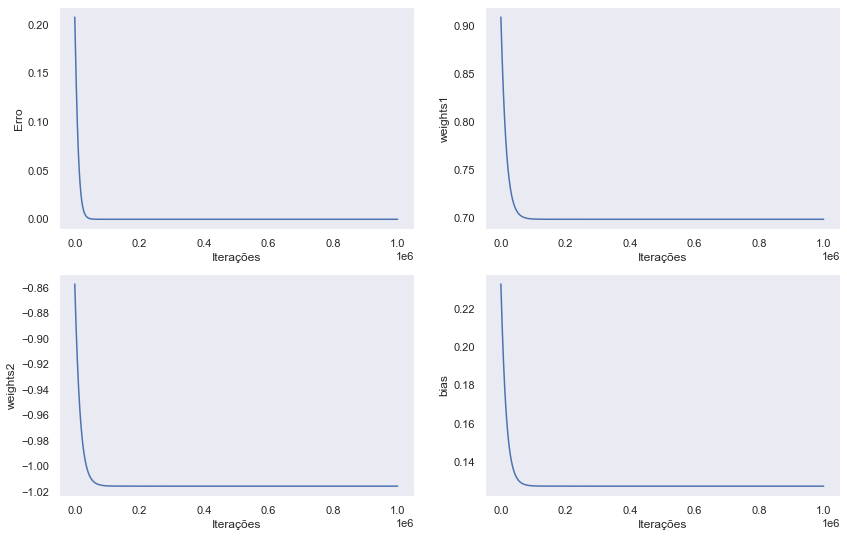

In [858]:
plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
plt.plot(net_error)
plt.ylabel('Erro')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,2)
plt.plot(net_weights1)
plt.ylabel('weights1')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,3)
plt.plot(net_weights2)
plt.ylabel('weights2')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,4)
plt.plot(net_bias)
plt.ylabel('bias')
plt.xlabel('Iterações')
plt.grid()

In [857]:
learning_rate = 0.01
parametros(learning_rate)
target = 0 
input_vector = [2, 1.5]
net_error = []
net_weights1 = []
net_weights2 = []
net_bias = []
for k in range(1000000):
    pred = predict(input_vector,weights, bias,'tangent')    
    prediction = pred[0]    
    error = erro(target, prediction)     
    net_error.append(error)
    gradiente = _compute_gradients(input_vector,prediction, target, 'tangent') 
    derror_dweights = gradiente[0]
    derror_dbias = gradiente[1]      
    atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
    bias = atualiza[0]
    weights = atualiza[1]
    net_weights1.append(weights[0])
    net_weights2.append(weights[1])
    net_bias.append(bias)

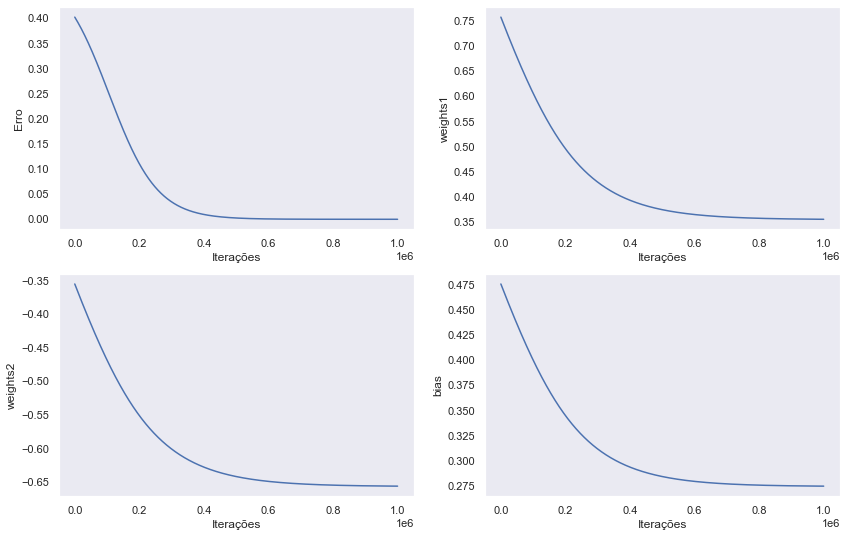

In [830]:
plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
plt.plot(net_error)
plt.ylabel('Erro')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,2)
plt.plot(net_weights1)
plt.ylabel('weights1')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,3)
plt.plot(net_weights2)
plt.ylabel('weights2')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,4)
plt.plot(net_bias)
plt.ylabel('bias')
plt.xlabel('Iterações')
plt.grid()

In [854]:
learning_rate = 0.01
parametros(learning_rate)
target1 = 1 
target2 = 0 
input_vector1 = [2, 1.5]
input_vector2 = [1.66, 1.56]
net_error = []
net_weights1 = []
net_weights2 = []
net_bias = []
for k in range(300000):
    pred1 = predict(input_vector1,weights, bias,'tangent')  
    pred2 = predict(input_vector2,weights, bias,'tangent')   
    prediction1 = pred1[0] 
    prediction2 = pred2[0]
    error1 = erro(target1, prediction1) 
    error2 = erro(target2, prediction2) 
    error = error1+error2
    net_error.append(error)
    gradiente1 = _compute_gradients(input_vector1,prediction1, target1,'tangent') 
    gradiente2 = _compute_gradients(input_vector2,prediction2, target2,'tangent')
    derror_dweights1 = gradiente1[0]
    derror_dbias1 = gradiente1[1]  
    error_dweights2 = gradiente2[0]
    derror_dbias2 = gradiente2[1] 
    derror_dweights = derror_dweights1 + error_dweights2
    derror_dbias = derror_dbias1 + derror_dbias2
    atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
    bias = atualiza[0]
    weights = atualiza[1]
    net_weights1.append(weights[0])
    net_weights2.append(weights[1])
    net_bias.append(bias)

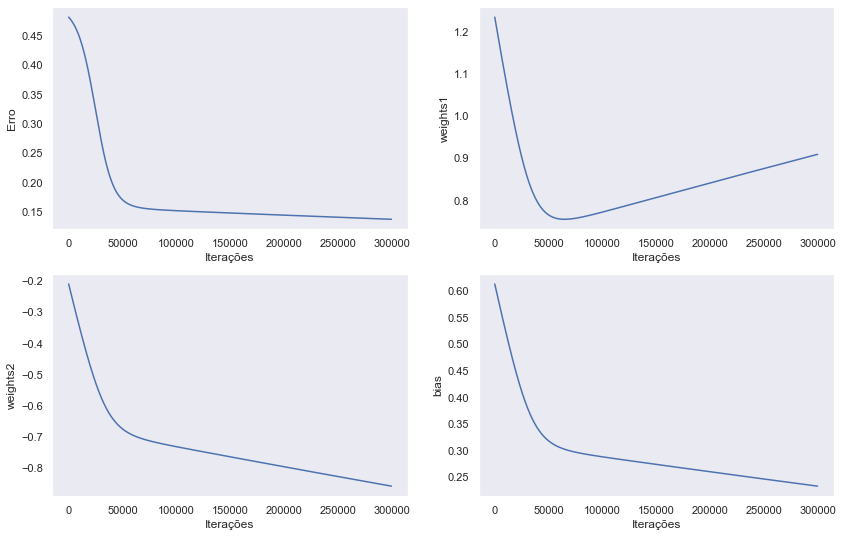

In [855]:
plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
plt.plot(net_error)
plt.ylabel('Erro')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,2)
plt.plot(net_weights1)
plt.ylabel('weights1')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,3)
plt.plot(net_weights2)
plt.ylabel('weights2')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,4)
plt.plot(net_bias)
plt.ylabel('bias')
plt.xlabel('Iterações')
plt.grid()

In [856]:
pred1[0],pred2[0]

(array([0.64454734]), array([0.38447058]))

In [840]:
df = pd.DataFrame(data=np.array([[2, 1.5, 1], [1.66, 1.56, 0]]), 
                  index= [1, 2], columns=['in1', 'in2', 'out'])
df

,in1,in2,out
1,2.00,1.50,1.0
2,1.66,1.56,0.0


In [862]:
import pandas as pd
learning_rate = 0.01
param = parametros(learning_rate)
weights= param[0]
bias= param[1]
target = np.array(df['out'])
input_vector = np.array([df['in1'],df['in2']])
gradiente = 0
derror_dweights = 0
derror_dbias = 0
net_error_total = []
net_weights1 = []
net_weights2 = []
net_bias = []
for k in range(20000):
    gradiente = 0
    derror_dweights = 0
    derror_dbias = 0
    error_total = 0
    pred_final =[]
    for i in range(2):        
        pred = predict(input_vector[0:2,i],weights, bias,'tangent')
        pred_final.append(pred[0])        
        prediction = pred[0]        
        error = erro(target[i], prediction)         
        error_total = error_total + error         
        gradiente = _compute_gradients(input_vector[0:2,i],prediction, target[i],'tangent')         
        derror_dweights = derror_dweights + gradiente[0]
        derror_dbias = derror_dbias +gradiente[1] 
    net_error_total.append(error_total)
    atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
    bias = atualiza[0]
    weights = atualiza[1]
    net_weights1.append(weights[0])
    net_weights2.append(weights[1])
    net_bias.append(bias)

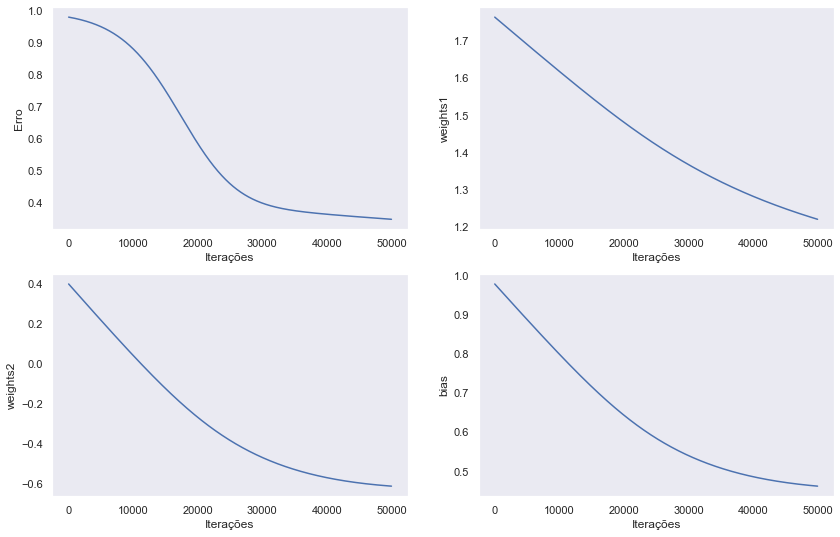

In [871]:
plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
plt.plot(net_error_total)
plt.ylabel('Erro')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,2)
plt.plot(net_weights1)
plt.ylabel('weights1')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,3)
plt.plot(net_weights2)
plt.ylabel('weights2')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,4)
plt.plot(net_bias)
plt.ylabel('bias')
plt.xlabel('Iterações')
plt.grid()

In [864]:
pred1[0],pred2[0]

(array([0.64454734]), array([0.38447058]))

In [865]:
df = pd.DataFrame(data=np.array([[2, 1.5, 1], [1.66, 1.56, 1], [1.3, 1.9, 0], [0.3, 2.1, 0]]), 
                  index= [1, 2, 3, 4], columns=['in1', 'in2', 'out'])
df

,in1,in2,out
1,2.00,1.50,1.0
2,1.66,1.56,1.0
3,1.30,1.90,0.0
4,0.30,2.10,0.0


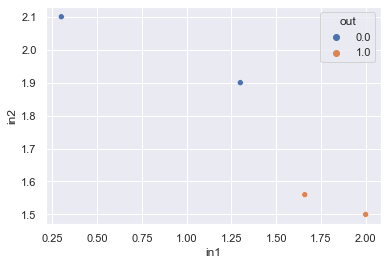

In [866]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.scatterplot(x='in1', y='in2', hue='out', data=df) 
plt.show()

In [881]:
import pandas as pd
learning_rate = 0.01
param = parametros(learning_rate)
weights= param[0]
bias= param[1]
target = np.array(df['out'])
input_vector = np.array([df['in1'],df['in2']])
gradiente = 0
derror_dweights = 0
derror_dbias = 0
net_error_total = []
net_weights1 = []
net_weights2 = []
net_bias = []
for k in range(100000):
    gradiente = 0
    derror_dweights = 0
    derror_dbias = 0
    error_total = 0
    pred_final =[]
    for i in range(4):         
        pred = predict(input_vector[0:2,i],weights, bias,'sigmoide')
        pred_final.append(pred[0])        
        prediction = pred[0]        
        error = erro(target[i], prediction)         
        error_total = error_total + error         
        gradiente = _compute_gradients(input_vector[0:2,i],prediction, target[i],'sigmoide')         
        derror_dweights = derror_dweights + gradiente[0]
        derror_dbias = derror_dbias +gradiente[1] 
    net_error_total.append(error_total)
    atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
    bias = atualiza[0]
    weights = atualiza[1]
    net_weights1.append(weights[0])
    net_weights2.append(weights[1])
    net_bias.append(bias)

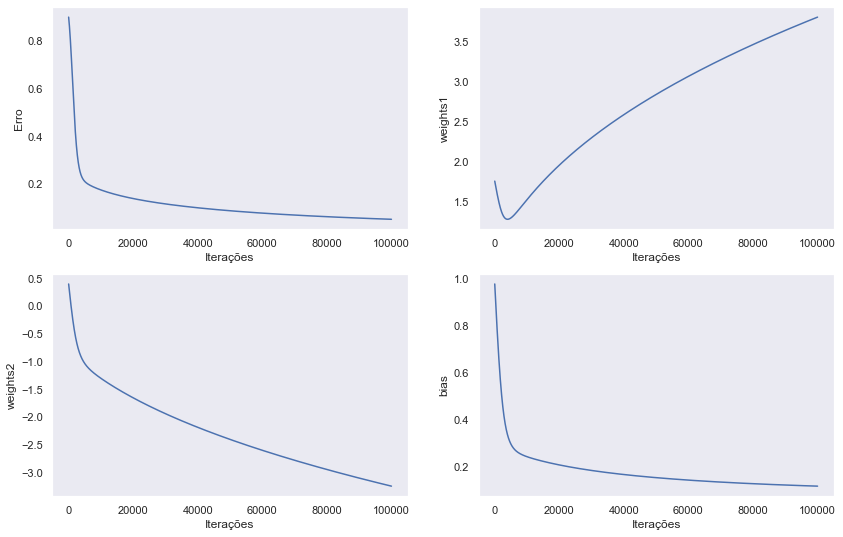

In [882]:
plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
plt.plot(net_error_total)
plt.ylabel('Erro')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,2)
plt.plot(net_weights1)
plt.ylabel('weights1')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,3)
plt.plot(net_weights2)
plt.ylabel('weights2')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,4)
plt.plot(net_bias)
plt.ylabel('bias')
plt.xlabel('Iterações')
plt.grid()

In [883]:
for i in range(4):
    pred = predict(input_vector[0:2,i],weights, bias,'sigmoide')
    print(pred[0])


[0.94681374]
[0.80025206]
[0.25199788]
[0.00386907]
